In [21]:
import pandas as pd

# 加载数据
file_path = 'nigerian-songs.csv'
df = pd.read_csv(file_path)

# 查看数据的前几行
print(df.head())

                       name                         album  \
0                    Sparky            Mandy & The Jungle   
1                shuga rush  EVERYTHING YOU HEARD IS TRUE   
2                     LITT!                         LITT!   
3  Confident / Feeling Cool               Enjoy Your Life   
4                wanted you                         rare.   

                artist artist_top_genre  release_date  length  popularity  \
0        Cruel Santino  alternative r&b          2019  144000          48   
1  Odunsi (The Engine)          afropop          2020   89488          30   
2                 AYLØ        indie r&b          2018  207758          40   
3           Lady Donli     nigerian pop          2019  175135          14   
4  Odunsi (The Engine)          afropop          2018  152049          25   

   danceability  acousticness  energy  instrumentalness  liveness  loudness  \
0         0.666        0.8510   0.420          0.534000    0.1100    -6.699   
1         0.

In [20]:
# 检查缺失值
print(df.isnull().sum())


name                0
album               0
artist              0
artist_top_genre    0
release_date        0
length              0
popularity          0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
time_signature      0
year                0
dtype: int64


In [4]:
# 检查重复值
print(df.duplicated().sum())

0


In [5]:
# 检查数据类型
print(df.dtypes)

# 将release_date转换为日期类型
df['release_date'] = pd.to_datetime(df['release_date'])

name                 object
album                object
artist               object
artist_top_genre     object
release_date          int64
length                int64
popularity            int64
danceability        float64
acousticness        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
time_signature        int64
dtype: object


In [7]:
# 查看基本统计信息
print(df.describe())
# 查看不同艺术家的歌曲数量分布
print(df['artist'].value_counts())

                        release_date         length  popularity  danceability  \
count                            530     530.000000  530.000000    530.000000   
mean   1970-01-01 00:00:00.000002015  222298.169811   17.507547      0.741619   
min    1970-01-01 00:00:00.000001998   89488.000000    0.000000      0.255000   
25%    1970-01-01 00:00:00.000002014  199305.000000    0.000000      0.681000   
50%    1970-01-01 00:00:00.000002016  218509.000000   13.000000      0.761000   
75%    1970-01-01 00:00:00.000002017  242098.500000   31.000000      0.829500   
max    1970-01-01 00:00:00.000002020  511738.000000   73.000000      0.966000   
std                              NaN   39696.822259   18.992212      0.117522   

       acousticness      energy  instrumentalness    liveness    loudness  \
count    530.000000  530.000000        530.000000  530.000000  530.000000   
mean       0.265412    0.760623          0.016305    0.147308   -4.953011   
min        0.000665    0.111000        

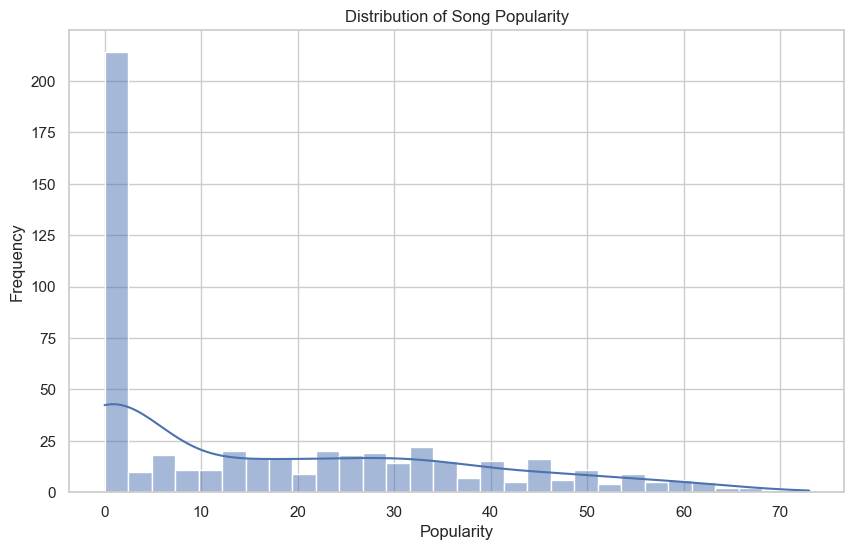

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置绘图风格
sns.set(style="whitegrid")

# 绘制歌曲流行度分布图
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

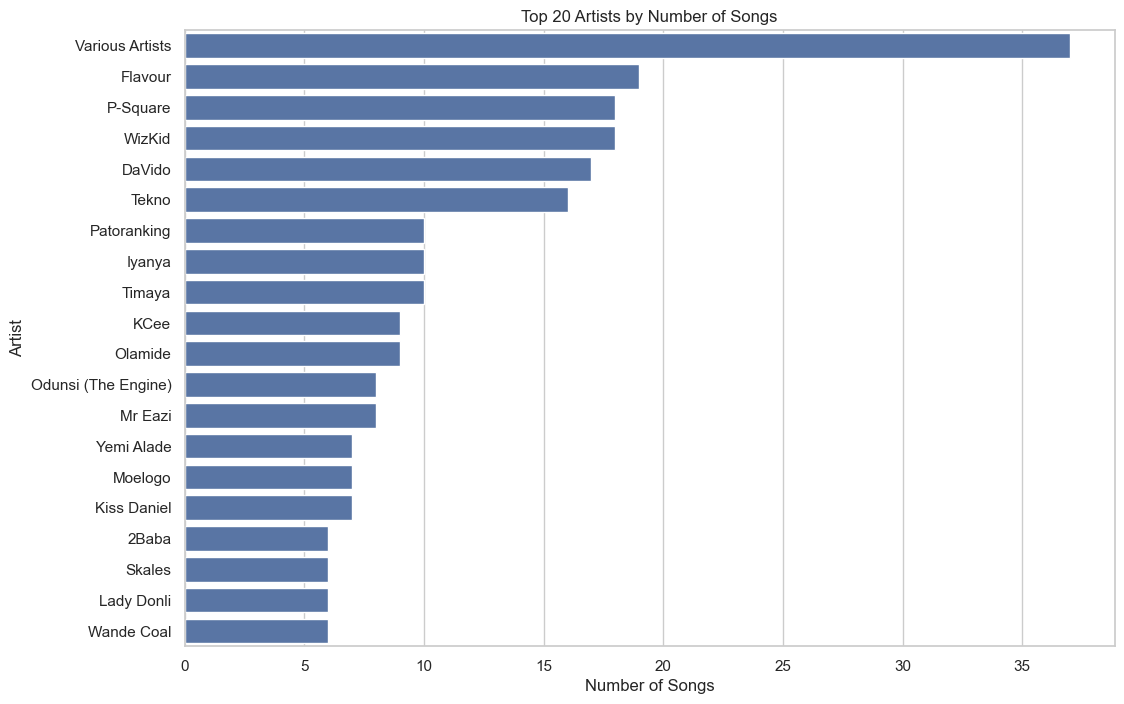

In [9]:
# 绘制不同艺术家的歌曲数量
plt.figure(figsize=(12, 8))
sns.countplot(y='artist', data=df, order=df['artist'].value_counts().index[:20])
plt.title('Top 20 Artists by Number of Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')
plt.show()

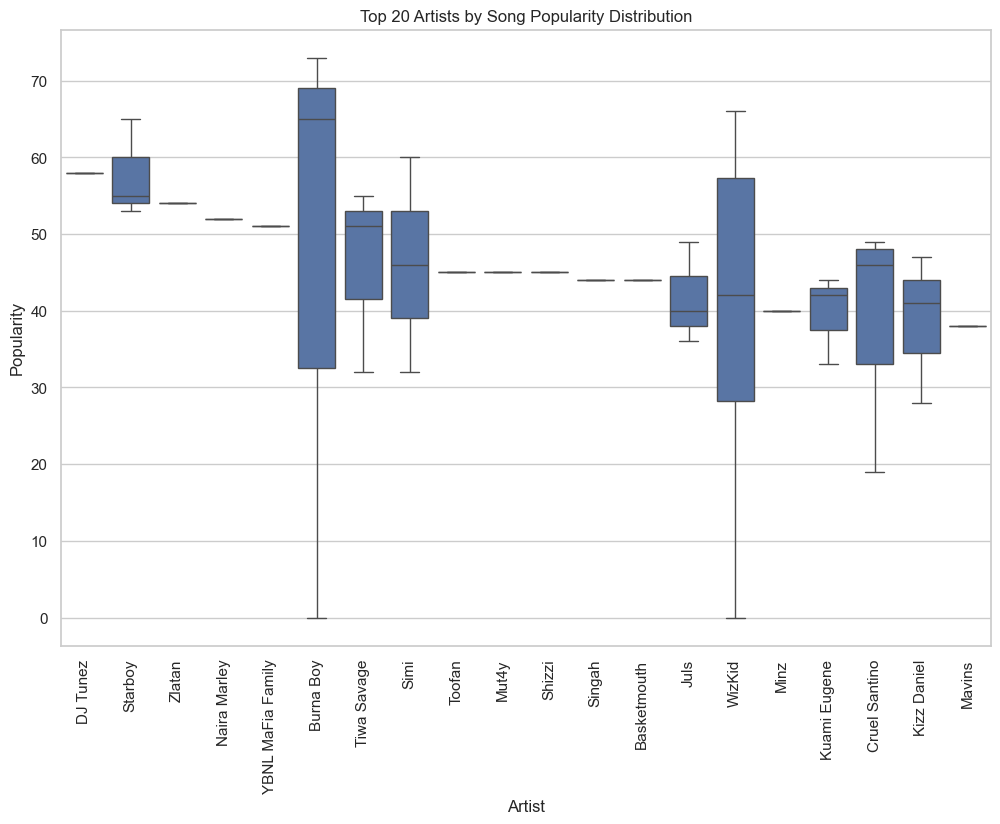

In [10]:
# 绘制不同艺术家的歌曲流行度分布
plt.figure(figsize=(12, 8))
sns.boxplot(x='artist', y='popularity', data=df, order=df.groupby('artist')['popularity'].mean().sort_values(ascending=False).index[:20])
plt.title('Top 20 Artists by Song Popularity Distribution')
plt.xlabel('Artist')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.show()

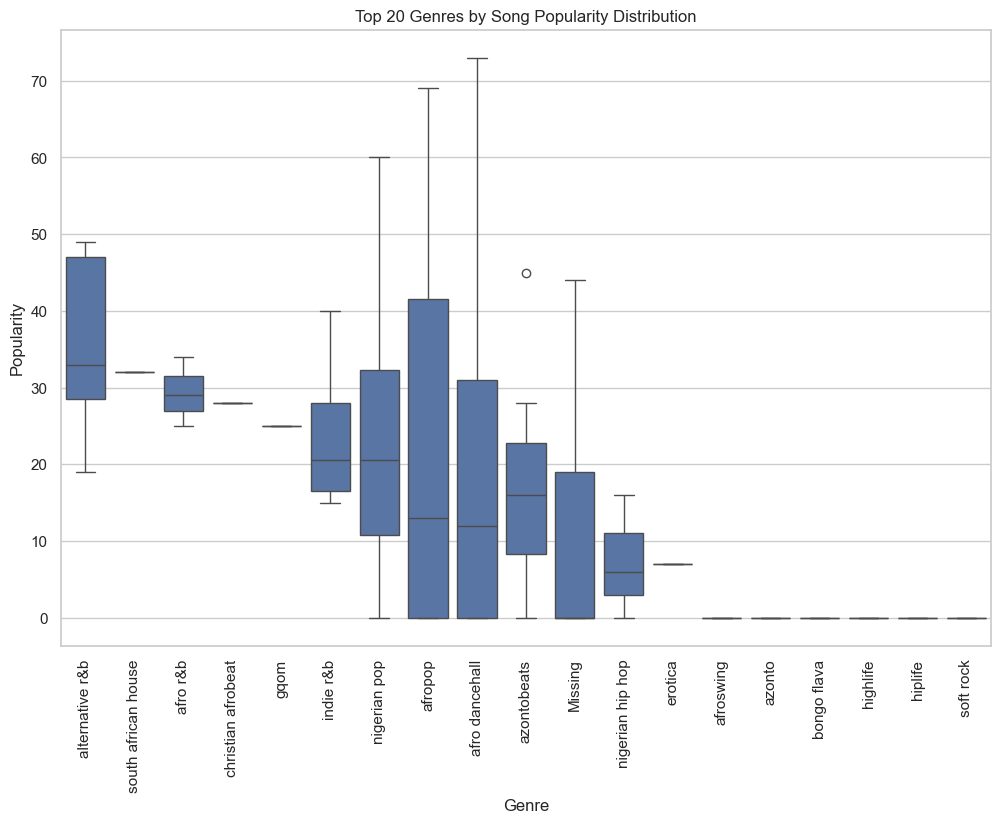

In [13]:
# 绘制不同音乐风格的歌曲流行度分布
plt.figure(figsize=(12, 8))
sns.boxplot(x='artist_top_genre', y='popularity', data=df, order=df.groupby('artist_top_genre')['popularity'].mean().sort_values(ascending=False).index[:20])
plt.title('Top 20 Genres by Song Popularity Distribution')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.xticks(rotation=90)
plt.show()

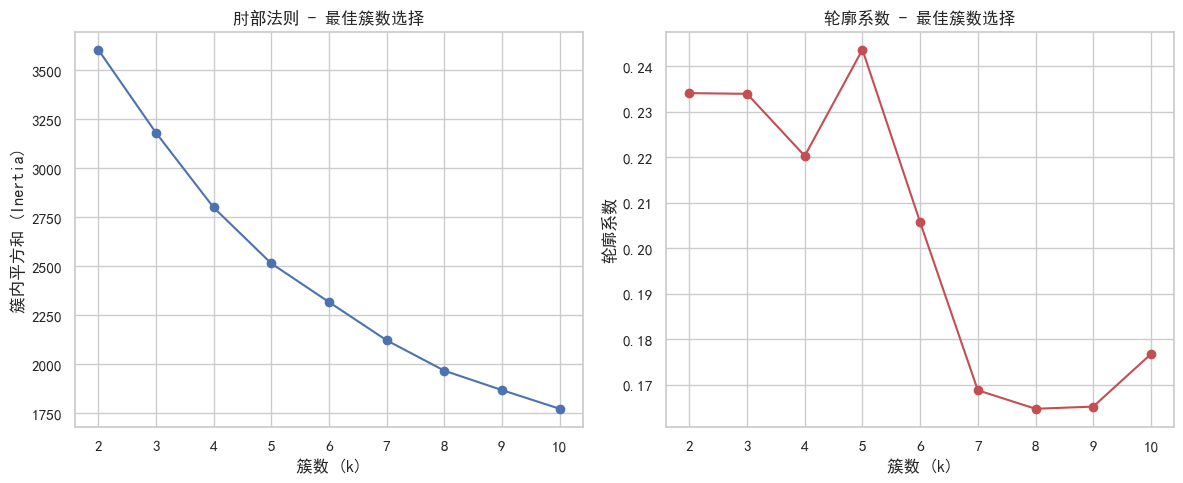

最佳簇数: 5 (轮廓系数最高)

聚类中心特征值:
   danceability    energy  loudness  speechiness  acousticness  \
0      0.687039  0.804725 -4.711686     0.157967      0.256245   
1      0.613868  0.752079 -4.732816     0.168924      0.306142   
2      0.733444  0.724556 -5.475778     0.109000      0.328733   
3      0.721161  0.572857 -7.807348     0.167037      0.385079   
4      0.772878  0.821341 -4.003900     0.109787      0.218373   

   instrumentalness  liveness       tempo  cluster  
0          0.004474  0.442745  109.397941        0  
1          0.003065  0.171374  180.791237        1  
2          0.646444  0.135433  107.653222        2  
3          0.007341  0.127303  103.995339        3  
4          0.005177  0.104702  114.602653        4  

各簇歌曲数量分布:
         count
cluster       
0           51
1           38
2            9
3          112
4          320

各簇音频特征均值:
         danceability    energy  loudness  speechiness  acousticness  \
cluster                                                    

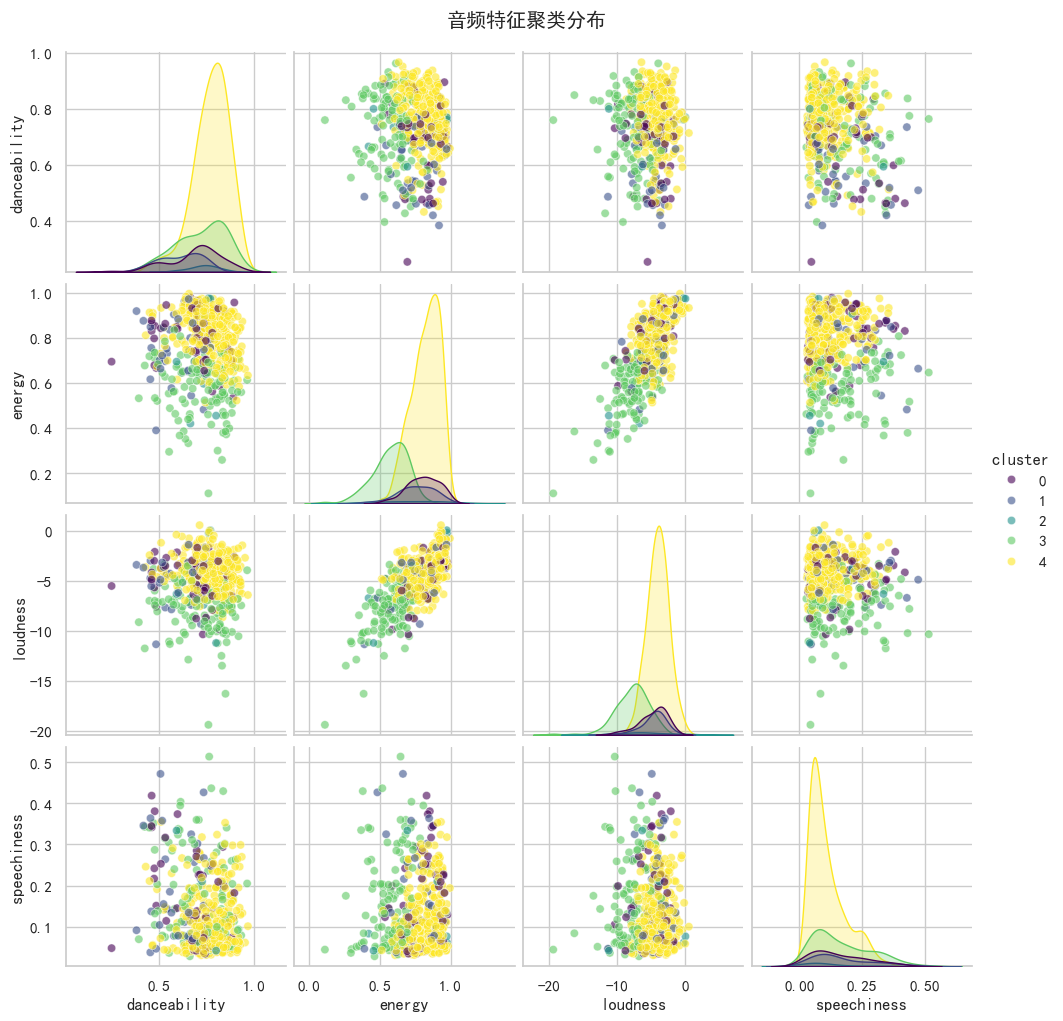

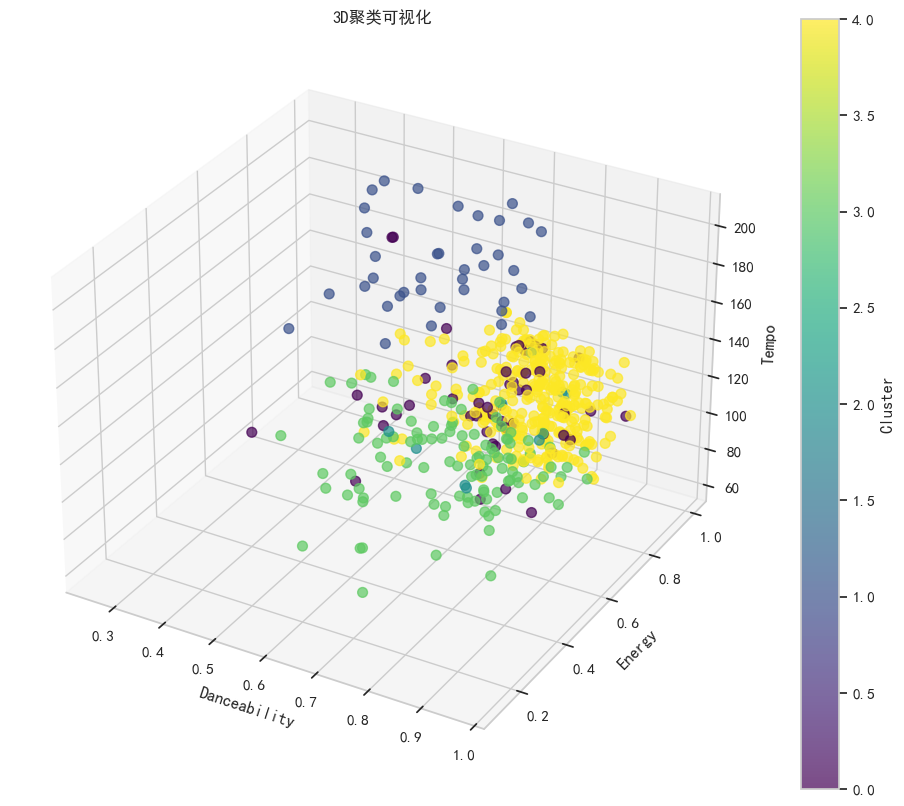

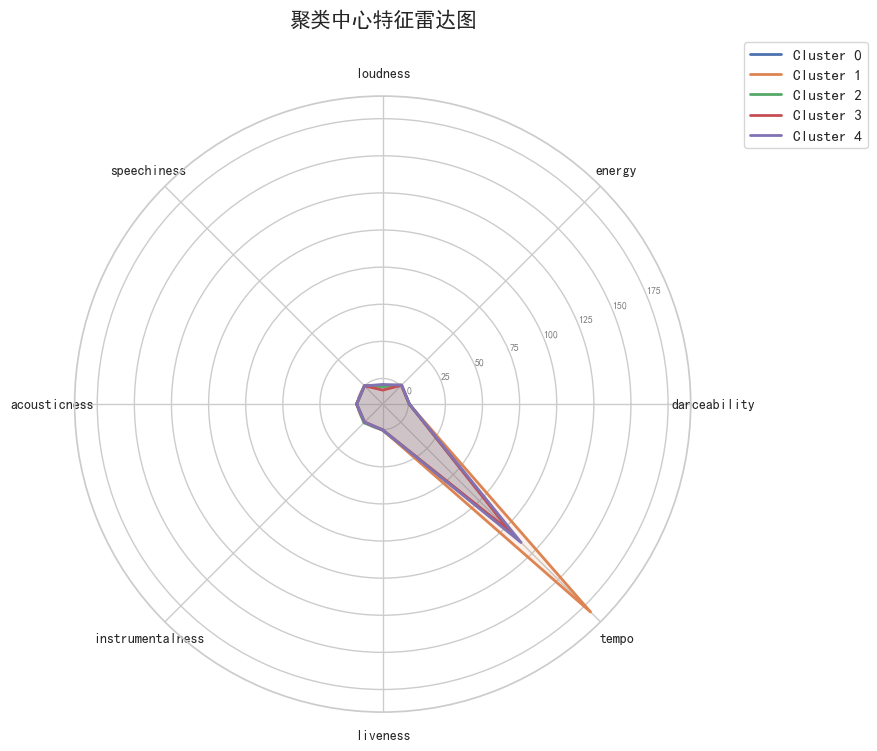


聚类音乐风格分析:
簇 0 (51 首歌):
高能量 - 充满活力的歌曲

主要音乐类型: afro dancehall, Missing, afropop
代表艺术家: Various Artists, Flavour, Maleek Berry

簇 1 (38 首歌):
高能量 - 充满活力的歌曲

主要音乐类型: afro dancehall, afropop, Missing
代表艺术家: Flavour, WizKid, P-Square

簇 2 (9 首歌):
高舞曲性 - 适合跳舞
高能量 - 充满活力的歌曲
器乐主导 - 人声较少

主要音乐类型: afro dancehall, alternative r&b, afropop
代表艺术家: Cruel Santino, Flavour, Odunsi (The Engine)

簇 3 (112 首歌):
高舞曲性 - 适合跳舞

主要音乐类型: afro dancehall, afropop, Missing
代表艺术家: Mr Eazi, Odunsi (The Engine), Various Artists

簇 4 (320 首歌):
高舞曲性 - 适合跳舞
高能量 - 充满活力的歌曲

主要音乐类型: afro dancehall, afropop, Missing
代表艺术家: Various Artists, DaVido, WizKid



In [69]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 数据预处理
# 转换日期格式并提取年份
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_year'] = df['release_date'].dt.year

# 选择用于聚类的音频特征
audio_features = ['danceability', 'energy', 'loudness', 'speechiness', 
                 'acousticness', 'instrumentalness', 'liveness', 'tempo']

# 创建特征子集
X = df[audio_features]

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 确定最佳簇数
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# 绘制肘部法则图
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('簇数 (k)')
plt.ylabel('簇内平方和 (Inertia)')
plt.title('肘部法则 - 最佳簇数选择')

# 绘制轮廓系数图
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('簇数 (k)')
plt.ylabel('轮廓系数')
plt.title('轮廓系数 - 最佳簇数选择')
plt.tight_layout()
plt.show()

# 选择最佳簇数（这里使用轮廓系数峰值）
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"最佳簇数: {optimal_k} (轮廓系数最高)")

# 使用最佳簇数进行聚类
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['cluster'] = kmeans.fit_predict(X_scaled)

# 分析聚类结果
cluster_summary = df.groupby('cluster')[audio_features].mean()
cluster_summary['count'] = df['cluster'].value_counts().sort_index()

# 添加簇中心点（原始尺度）
cluster_centers_scaled = kmeans.cluster_centers_
cluster_centers_original = scaler.inverse_transform(cluster_centers_scaled)
cluster_centers_df = pd.DataFrame(cluster_centers_original, columns=audio_features)
cluster_centers_df['cluster'] = cluster_centers_df.index

print("\n聚类中心特征值:")
print(cluster_centers_df)

print("\n各簇歌曲数量分布:")
print(cluster_summary[['count']])

print("\n各簇音频特征均值:")
print(cluster_summary.drop(columns='count'))

# 可视化聚类结果
# 特征对图
sns.pairplot(df, vars=audio_features[:4], hue='cluster', palette='viridis', 
             plot_kws={'alpha': 0.6}, diag_kind='kde')
plt.suptitle('音频特征聚类分布', y=1.02)
plt.show()

# 3D散点图
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df['danceability'], 
    df['energy'], 
    df['tempo'],
    c=df['cluster'], 
    cmap='viridis',
    s=50,
    alpha=0.7
)

ax.set_xlabel('Danceability')
ax.set_ylabel('Energy')
ax.set_zlabel('Tempo')
ax.set_title('3D聚类可视化')
plt.colorbar(scatter, label='Cluster')
plt.show()

# 簇特征雷达图
plt.figure(figsize=(12, 8))
ax = plt.subplot(111, polar=True)

# 准备雷达图数据
categories = audio_features
N = len(categories)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

# 绘制每个簇的雷达图
for cluster in range(optimal_k):
    values = cluster_centers_df.loc[cluster, categories].values.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', 
            label=f'Cluster {cluster}')
    ax.fill(angles, values, alpha=0.1)

# 添加标签
plt.xticks(angles[:-1], categories, size=10)
plt.yticks(color='grey', size=7)
plt.title('聚类中心特征雷达图', size=15, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()

# 聚类解释和音乐风格分析
cluster_descriptions = []
for cluster_id in range(optimal_k):
    cluster_data = df[df['cluster'] == cluster_id]
    
    # 获取主要音乐类型
    top_genres = cluster_data['artist_top_genre'].value_counts().head(3)
    top_artists = cluster_data['artist'].value_counts().head(3)
    
    # 特征描述
    features = cluster_centers_df.loc[cluster_id]
    description = f"簇 {cluster_id} ({cluster_summary.loc[cluster_id, 'count']} 首歌):\n"
    
    if features['danceability'] > 0.7:
        description += "高舞曲性 - 适合跳舞\n"
    elif features['danceability'] < 0.5:
        description += "低舞曲性 - 节奏感不强\n"
    
    if features['energy'] > 0.7:
        description += "高能量 - 充满活力的歌曲\n"
    elif features['energy'] < 0.4:
        description += "低能量 - 舒缓放松的歌曲\n"
    
    if features['acousticness'] > 0.6:
        description += "原声音乐 - 使用原声乐器\n"
    
    if features['instrumentalness'] > 0.5:
        description += "器乐主导 - 人声较少\n"
    
    description += f"\n主要音乐类型: {', '.join(top_genres.index)}\n"
    description += f"代表艺术家: {', '.join(top_artists.index)}\n"
    
    cluster_descriptions.append(description)

print("\n聚类音乐风格分析:")
for desc in cluster_descriptions:
    print(desc)
    print